# 1-D gradient descent

In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 

In [13]:
def differential(x):
    return 2*x+ 5*np.cos(x)

def cost(x):
    return x**2 + 5*np.sin(x)

def GradientDescent(eta, x0, iterations = 100):
    x = [x0]
    for it in range(iterations):
        x_new = x[-1] - eta*differential(x[-1])
        if abs(differential(x_new)) < 1e-3:
            break
        x.append(x_new)   
    
    return np.array(x), it

def visualization(x, cost, eta, equation, filename = 'GradientDescent'):
    it = len(x)
    y = cost(x)
    
    if(np.abs(np.max(x)) > np.abs(np.min(x))):
        xmin, xmax = -np.max(x), np.max(x)
    else:
        xmin, xmax = np.min(x), np.abs(np.min(x))

    ymin, ymax = np.min(y), np.max(y)
    
    x0 = np.linspace(xmin-1, xmax+1, 1000)
    y0 = cost(x0)
       
    fig, ax = plt.subplots(figsize=(4, 4))  
    
    def update(i):
        ani = plt.cla()
        plt.axis([xmin - 1, xmax + 1, ymin - 5, ymax + 5])
        plt.plot(x0, y0)
        title = equation + '$; x_0 = $' + str(x[0]) + '$; \eta = $' + str(eta)
        ani = plt.title(title)
        if i == 0:
            ani = plt.plot(x[i], y[i], 'ro', markersize = 7)
        else:
            ani = plt.plot(x[i-1], y[i-1], 'ok', markersize = 7)
            ani = plt.plot(x[i-1:i+1], y[i-1:i+1], 'k-')
            ani = plt.plot(x[i], y[i], 'ro', markersize = 7)
        label = 'Iteration: %d/%d' %(i, it - 1)
        ax.set_xlabel(label)
        return ani, ax 
        
    anim = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    anim.save(filename + str('.gif'), dpi = 100, writer = 'imagemagick')
    plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


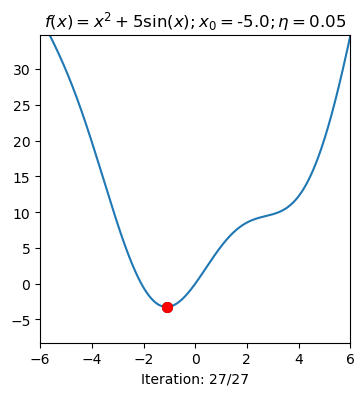

MovieWriter imagemagick unavailable; using Pillow instead.


Solution x1 = -1.110714, cost = -3.246394, obtained after 28 iterations


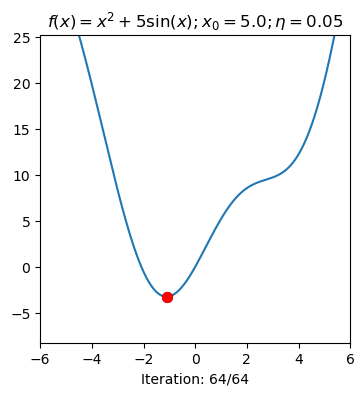

Solution x2 = -1.110341, cost = -3.246394, obtained after 65 iterations


In [14]:
learning_rate = 0.05

x1, it1 = GradientDescent(learning_rate, -5)
visualization(x1, cost, learning_rate, '$f(x) = x^2 + 5\sin(x)$', 'GD1')
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1 + 1))

x2, it2 = GradientDescent(learning_rate, 5)
visualization(x2, cost, learning_rate, '$f(x) = x^2 + 5\sin(x)$', 'GD2')
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2 + 1))


# With momentum and NAG

MovieWriter imagemagick unavailable; using Pillow instead.


Solution x3 = 3.836788, cost = 8.315588, obtained after 5 iterations


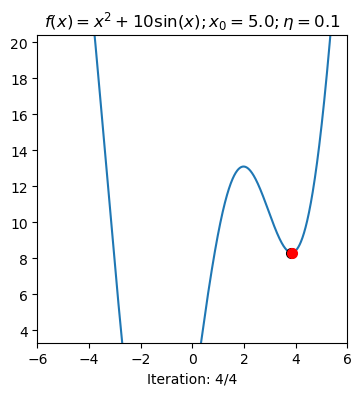

MovieWriter imagemagick unavailable; using Pillow instead.


Solution with momentum x4 = -1.305296, cost = -7.945816, obtained after 148 iterations


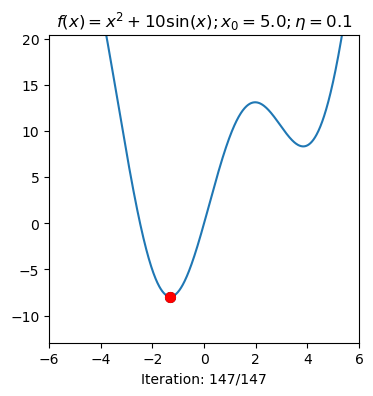

MovieWriter imagemagick unavailable; using Pillow instead.


Solution with NAG x5 = -1.306342, cost = -7.945823, obtained after 20 iterations


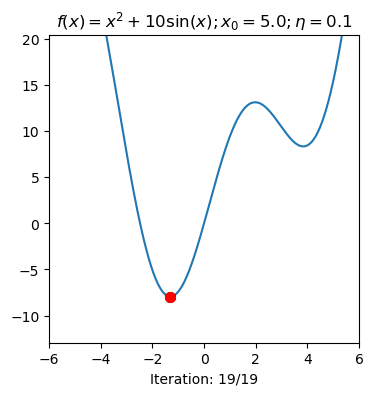

In [15]:
def differential(x):
    return 2*x+ 10*np.cos(x)

def cost(x):
    return x**2 + 10*np.sin(x)

def Momentum(x0, eta, gamma = 0.9, iterations = 1000):
    x = [x0]
    v_old = np.zeros_like(x0)
    for it in range(iterations):
        v_new = gamma*v_old + eta*differential(x[-1])
        x_new = x[-1] - v_new
        if abs(differential(x_new)) < 1e-3:
            break
        x.append(x_new)
        v_old = v_new 
    return np.array(x), it

def NAG(x0, eta, gamma = 0.9, iterations = 1000):
    x = [x0]
    v_old = np.zeros_like(x0)
    for it in range(iterations):
        v_new = gamma*v_old + eta*differential(x[-1] - gamma*v_old)
        x_new = x[-1] - v_new
        if abs(differential(x_new)) < 1e-3:
            break
        x.append(x_new)
        v_old = v_new 
    return np.array(x), it

learning_rate  = 0.1

x3, it3 = GradientDescent(learning_rate, 5)
print('Solution x3 = %f, cost = %f, obtained after %d iterations'%(x3[-1], cost(x3[-1]), it3 + 1))
visualization(x3, cost, learning_rate, '$f(x) = x^2 + 10\sin(x)$', 'GD3-without-momentum')

x4, it4 = Momentum(5, learning_rate)
print('Solution with momentum x4 = %f, cost = %f, obtained after %d iterations'%(x4[-1], cost(x4[-1]), it4 + 1))
visualization(x4, cost, learning_rate, '$f(x) = x^2 + 10\sin(x)$', 'GD4-momentum')

x5, it5 = NAG(5, learning_rate)
print('Solution with NAG x5 = %f, cost = %f, obtained after %d iterations'%(x5[-1], cost(x5[-1]), it5 + 1))
visualization(x5, cost, learning_rate, '$f(x) = x^2 + 10\sin(x)$', 'GD5-NAG')

# 2-D gradient descent

In [2]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(2)

In [330]:
X = np.random.rand(1000, 1)
Y = 4 + 3*X + 0.2*np.random.randn(1000, 1)

one = np.ones((X.shape[0], 1))
X_bar = np.concatenate((X, one), axis = 1)

model = linear_model.LinearRegression(fit_intercept=False).fit(X_bar, Y)
w = model.coef_

print('Result of linear regression model w:', w)

Result of linear regression model w: [[3.00368942 3.98925246]]


Gradient descent for loss function of linear regression

In [331]:
def differential(x_bar, y, w):
    N = x_bar.shape[0]
    return (1/N)*X_bar.T.dot(X_bar.dot(w) - y) 

def cost(x_bar, y, w):
    N = x_bar.shape[0]
    return 0.5*(1/N)*np.linalg.norm(y - x_bar.dot(w), 2)**2

def gradient_descent(x_bar, y, w0, eta, differential, iterations = 1000):
    w = [w0]
    for it in range(iterations):
        w_new = w[-1] - eta*differential(x_bar, y, w[-1])
        if np.linalg.norm(differential(x_bar, y, w_new))/len(w_new) < 1e-5:
            break
        w.append(w_new)   
    
    return np.array(w), it

In [332]:
def numerical_gradient(x_bar, y, w, cost):
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (cost(x_bar, y, w_p) - cost(x_bar, y, w_n))/(2*eps)
    return g 

def check_gradient(w, cost, differential):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = differential(X_bar, Y, w)
    grad2 = numerical_gradient(X_bar, Y, w, cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 

print('Checking gradient formula...', check_gradient(np.random.rand(2, 1), cost, differential))

Checking gradient formula... True


In [333]:
w_init = np.array([[2], [1]])
print('Initial parameters w:', w_init.T)
print('')

learning_rate = 1.495
w_GD, it = gradient_descent(X_bar, Y, w_init, learning_rate, differential)

print('Result tuning from gradient descent with learning rate ' + str(learning_rate) +  ' after ' +  str(it + 1) + ' iterations w:', w_GD[-1].T)
print('Result of linear regression model w:', w)
print('Difference between 2 methods:', w - w_GD[-1].T)
print('')

learning_rate = 1.0
w_GD, it = gradient_descent(X_bar, Y, w_init, learning_rate, differential)

print('Result tuning from gradient descent with learning rate ' + str(learning_rate) +  ' after ' +  str(it + 1) + ' iterations w:', w_GD[-1].T)
print('Result of linear regression model w:', w)
print('Difference between 2 methods:', w - w_GD[-1].T)
print('')

learning_rate = 0.5
w_GD, it = gradient_descent(X_bar, Y, w_init, learning_rate, differential)

print('Result tuning from gradient descent with learning rate ' + str(learning_rate) +  ' after ' +  str(it + 1) + ' iterations w:', w_GD[-1].T)
print('Result of linear regression model w:', w)
print('Difference between 2 methods:', w - w_GD[-1].T)
print('')

Initial parameters w: [[2 1]]

Result tuning from gradient descent with learning rate 1.495 after 109 iterations w: [[3.00369425 3.98923112]]
Result of linear regression model w: [[3.00368942 3.98925246]]
Difference between 2 methods: [[-4.82873723e-06  2.13449736e-05]]

Result tuning from gradient descent with learning rate 1.0 after 116 iterations w: [[3.00398213 3.98909639]]
Result of linear regression model w: [[3.00368942 3.98925246]]
Difference between 2 methods: [[-0.00029271  0.00015607]]

Result tuning from gradient descent with learning rate 0.5 after 235 iterations w: [[3.00397973 3.98909767]]
Result of linear regression model w: [[3.00368942 3.98925246]]
Difference between 2 methods: [[-0.00029031  0.00015479]]



MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.


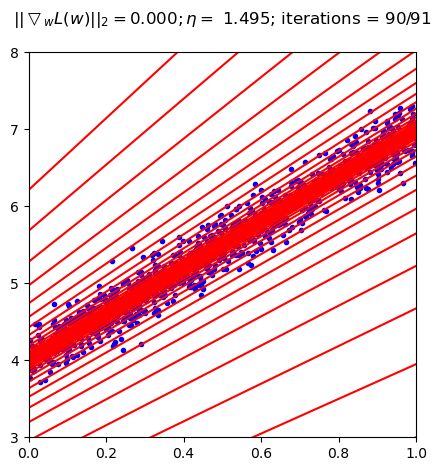

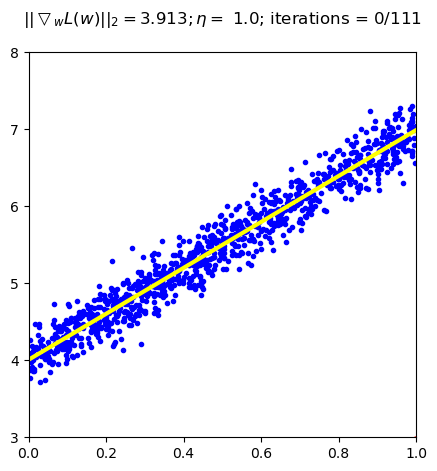

In [41]:
from matplotlib.animation import FuncAnimation 

def visualization(x_bar, y, w_model, w_init, eta, fn, filename = 'GradientDescent 2D'):
    x = x_bar[:,0]

    w, it = gradient_descent(x_bar, y, w_init, eta, differential)
    fig, ax = plt.subplots(figsize=(5, 5))    
    plt.cla()
    x0 = np.linspace(0, 1, 2, endpoint=True)
    
    def update(i):
        if i == 0:
            plt.cla()
            plt.plot(x, y, 'b.')
            plt.axis([int(np.min(x)), int(np.max(x) + 1), int(np.min(y)), int(np.max(y) + 1)])
            y0 = w_model[:,0]*x0 + w_model[:,1]
            plt.plot(x0, y0, color = 'yellow', linewidth = 3)

        y0 =  w[i].T[:,0]*x0 + w[i].T[:,1]
        animlist = plt.plot(x0, y0, 'r', linewidth = 1.5) 
        label = fn +  '$= %.3f$' % np.linalg.norm(differential(x_bar, y, w[i]))
        label += '$; \eta =$ ' + str(eta) + '; iterations = %d/%d\n' %(i, it)
        ax.set_title(label)
        return animlist, ax
    
    anim1 = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    anim1.save(filename + '-' + str(eta) + '.gif', dpi=100, writer='imagemagick')

visualization(X_bar, Y, w, w_init, 1.495, r'$||\bigtriangledown_w L(w)||_2$', 'GD1-2D')
visualization(X_bar, Y, w, w_init, 1.0, r'$||\bigtriangledown_w L(w)||_2$', 'GD1-2D')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

In [58]:
def differential(vars):
    x = vars[0]
    y = vars[1]
    g = np.array(vars, dtype = float)
    g[0] = 0.04*(x**3) - 2*x
    g[1] = 2*y
    return g

def cost(vars):
    x = vars[0]
    y = vars[1]
    return 0.01*(x**4) - x**2 + y**2

def gradient_descent(vars_init, eta, differential, iterations = 1000):
    vars = [vars_init]
    for it in range(iterations):
        vars_new = vars[-1] - eta*differential(vars[-1])
        if np.linalg.norm(differential(vars_new))/len(vars_new) < 1e-3:
            break
        vars.append(vars_new)  
        if it == iterations - 1:
            print('\nThe result is not converged..')
    return vars, it

def numerical_gradient(vars, cost):
    eps = 1e-6
    g = np.zeros_like(vars)
    for i in range(len(vars)):
        vars_p = vars.copy()
        vars_n = vars.copy()
        vars_p[i] += eps 
        vars_n[i] -= eps
        g[i] = (cost(vars_p) - cost(vars_n))/(2*eps)
    return g 

def check_gradient(vars, cost, differential):
    vars = np.random.rand(vars.shape[0], vars.shape[1])
    grad1 = differential(vars)
    grad2 = numerical_gradient(vars, cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 

print('Checking gradient formula...', check_gradient(np.random.rand(2, 1), cost, differential))
print('')

init_point = np.array([[-5], [5]])
print('Initial parameters w: [%.2f, %.2f]' %(init_point[0],init_point[1]))

learning_rate = 0.05
w_GD, it = gradient_descent(init_point, learning_rate, differential)
print("Result tuning from gradient descent with learning rate %.2f after %d iterations w: [%.2f, %.2f]" %(learning_rate, it + 1, w_GD[-1][0], w_GD[-1][1]))

learning_rate = 1.0
w_GD, it = gradient_descent(init_point, learning_rate, differential, 200)
print("Result tuning from gradient descent with learning rate %.2f after %d iterations w: [%.2f, %.2f]" %(learning_rate, it + 1, w_GD[-1][0], w_GD[-1][1]))

Checking gradient formula... True

Initial parameters w: [-5.00, 5.00]
Result tuning from gradient descent with learning rate 0.05 after 81 iterations w: [-7.07, 0.00]

The result is not converged..
Result tuning from gradient descent with learning rate 1.00 after 200 iterations w: [10.00, 5.00]


In [23]:
delta = 0.025
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-6.0, 6.0, delta)

MovieWriter imagemagick unavailable; using Pillow instead.


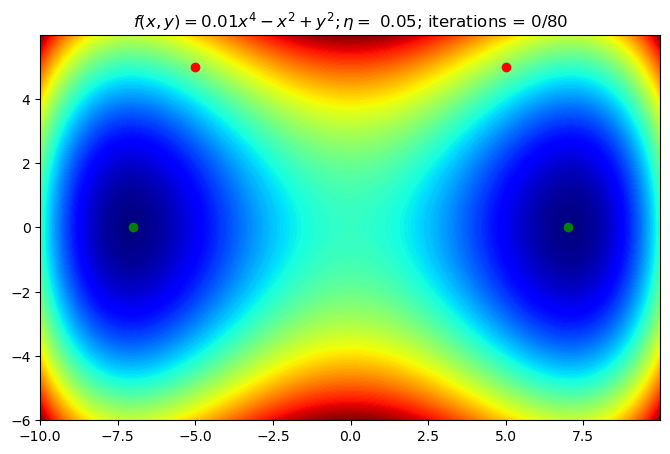

In [25]:
from matplotlib.animation import FuncAnimation 

def visualization2(x, y, w_goal, w_init, eta, fn, filename = 'GradientDescent 2D'):

    w, it = gradient_descent(w_init[0,:], eta, differential, 200)
    w2, it2 = gradient_descent(w_init[1,:], eta, differential, 200)
    fig, ax = plt.subplots(figsize=(8, 5))    
    plt.cla()
    plt.axis([np.min(x), np.max(x), np.min(y), np.max(y)])

    X, Y = np.meshgrid(x, y)
    Z = 0.01*(X**4) - X**2 + Y**2
    
    def update(i):
        if i == 0:
            plt.cla()
            plt.contourf(X, Y, Z, 200, cmap='jet')
            plt.plot(w_goal[:,0], w_goal[:,1], 'go')
        else:
            animlist = plt.plot([w[i-1][0], w[i][0]], [w[i-1][1], w[i][1]], 'r-') 
            animlist = plt.plot([w2[i-1][0], w2[i][0]], [w2[i-1][1], w2[i][1]], 'r-')       

        animlist = plt.plot(w[i][0], w[i][1], 'ro') 
        animlist = plt.plot(w2[i][0], w2[i][1], 'ro') 

        label = fn + '$; \eta =$ ' + str(eta) + '; iterations = %d/%d' %(i, it)
        ax.set_title(label)
        return animlist, ax
    
    anim1 = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    anim1.save(filename + '-' + str(eta) + '.gif', dpi=100, writer='imagemagick')

desired_point = np.array([[-7, 0], [7, 0]])
init_point = np.array([[-5, 5], [5, 5]])
visualization2(x, y, desired_point, init_point, 0.05, r'$f(x,y) = 0.01x^4 - x^2  + y^2$', 'GD2-2D')
# visualization2(X, Y, desired_point, init_point, 1.0, r'$||\bigtriangledown_w L(w)||_2$', 'GD2-2D')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib ipympl

C:\Users\Admins\AppData\Local\Temp\ipykernel_33096\2520877789.py:12: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  surf = ax.contour(X, Y, Z, cmap='jet', edgecolor='none')


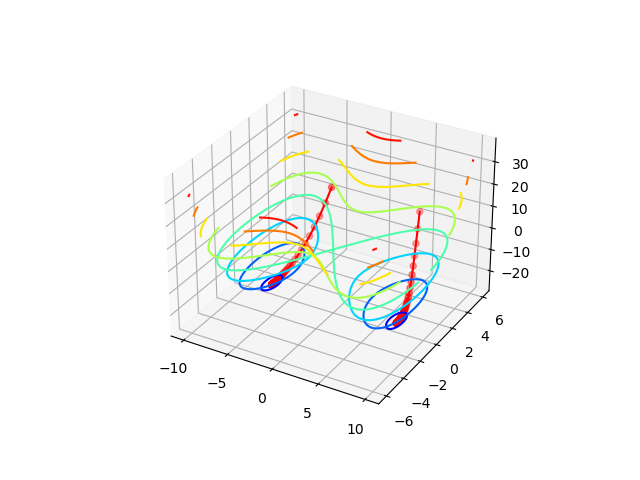

In [56]:
X, Y = np.meshgrid(x, y)
Z = 0.01*(X**4) - X**2 + Y**2

w_GD, it = gradient_descent(np.array([-5, 5]), 0.05, differential)
z = 0.01*(np.array(w_GD)[:,0]**4) - np.array(w_GD)[:,0]**2 + np.array(w_GD)[:,1]**2

w_GD2, it2 = gradient_descent(np.array([5, 5]), 0.05, differential)
z2 = 0.01*(np.array(w_GD2)[:,0]**4) - np.array(w_GD2)[:,0]**2 + np.array(w_GD2)[:,1]**2

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.contour(X, Y, Z, cmap='jet', edgecolor='none')
surf = ax.scatter(np.array(w_GD)[:,0],np.array(w_GD)[:,1], z, color='red')
surf = ax.plot(np.array(w_GD)[:,0],np.array(w_GD)[:,1], z, color='red')
surf = ax.scatter(np.array(w_GD2)[:,0],np.array(w_GD2)[:,1], z2, color='red')
surf = ax.plot(np.array(w_GD2)[:,0],np.array(w_GD2)[:,1], z2, color='red')